In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1EHa0Vo_HzlXRZyGWkjDC0Hhj3pXH6HvBoFtAIpnqeVk/edit#gid=0'
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [3]:
df = pd.read_csv(url)
df = df.copy()

In [4]:
# check for datta type and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Week               260 non-null    int64 
 1   Category           260 non-null    object
 2   Customers          260 non-null    int64 
 3   Contacts           260 non-null    int64 
 4   Accepted Contacts  260 non-null    int64 
 5   Revenue            260 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.3+ KB


Data is clean with no null values.

In [5]:
df.describe()

,Week,Customers,Contacts,Accepted Contacts,Revenue
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,7.000000,2120.819231,6193.861538,3317.630769,59435.726923
std,3.748874,1809.850866,5098.760151,3281.590785,33267.492678
min,1.000000,299.000000,871.000000,477.000000,18239.000000
25%,4.000000,1144.750000,3286.250000,1408.000000,38710.750000
50%,7.000000,1486.000000,4608.500000,2189.000000,50739.500000
75%,10.000000,2291.500000,6372.500000,3609.250000,67737.000000
max,13.000000,9688.000000,27026.000000,18619.000000,184214.000000


Looking at the summary statistics we can deduce the following:
- There are thirteen weeks worth of data.
- Max revenue (184214) differs significantly from the mean (50739). This point could potentially be an outlier and can skew the analysis to discover any meaningful trend.

Based on the above, we shall proceed to plot a distribution of Revenue.

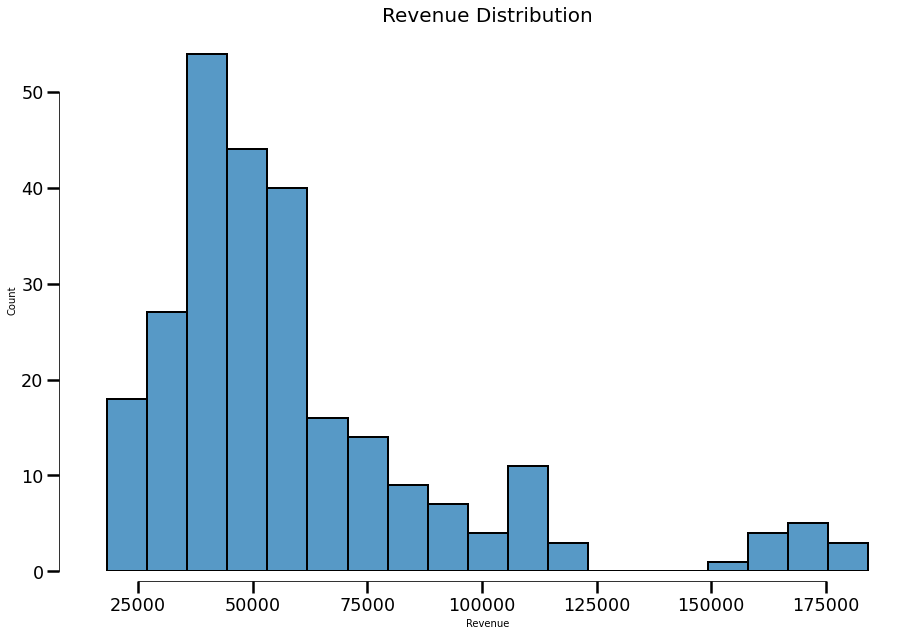

In [6]:
# Histogram Distribution plot of Revenue
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.histplot(x = 'Revenue', data = df)
sns.despine(offset = 10, trim = True)
plt.title('Revenue Distribution')
plt.show()

Confirming the deductions from the summary statistics, revenues above 125000 appear to be outliers. Revenue distribution is right skewed as majority of data points fall on the lower end of the chart.
Let's further create a box plot to identify these outliers.

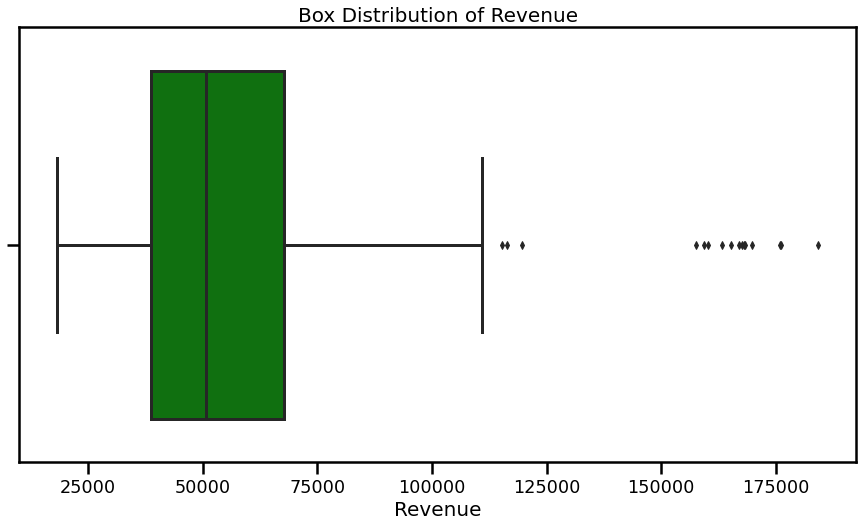

In [7]:
# Box Distribution of Revenue
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.boxplot(x = df['Revenue'], color = 'green')
plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('Box Distribution of Revenue')
plt.show()

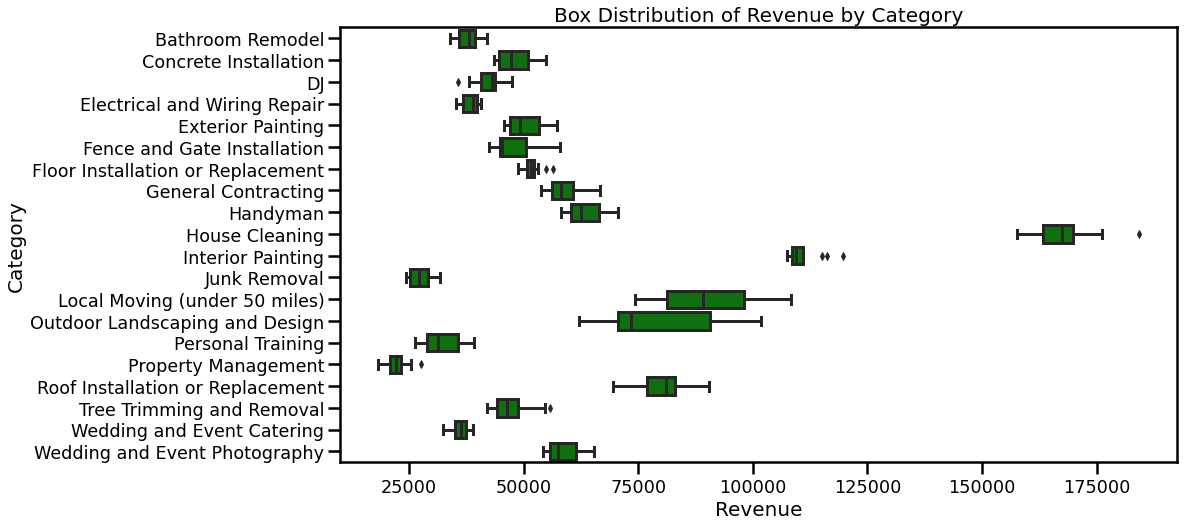

In [8]:
# Box Distribution of Revenue by Category
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.boxplot(x = df['Revenue'], y = df['Category'], color = 'green')
plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('Box Distribution of Revenue by Category')
plt.show()

In [9]:
# df_wk_obj = df.copy()
# df_wk_obj['Week'] = df_wk_obj['Week'].astype('str')

The Box Distribution plot is even more helpful in identifying the number of points that are above three (3) standard deviations from the mean, i.e., outliers. Further exploratory analysis will be done to determine the effect of these points in the overall weekly trend of revenue.

We shall proceed to visualize the overall trend and compare with one that excludes the outliers. This will be a measure of the influence/impact of these extreme data points.

**Notes**: Add some context to Box distribution by Week and Category.

To get an overall trend, the revenue is aggregated by week.

In [11]:
# Total Weekly Revenue
total_wkly_rev = df.groupby('Week')['Revenue'].sum().reset_index()

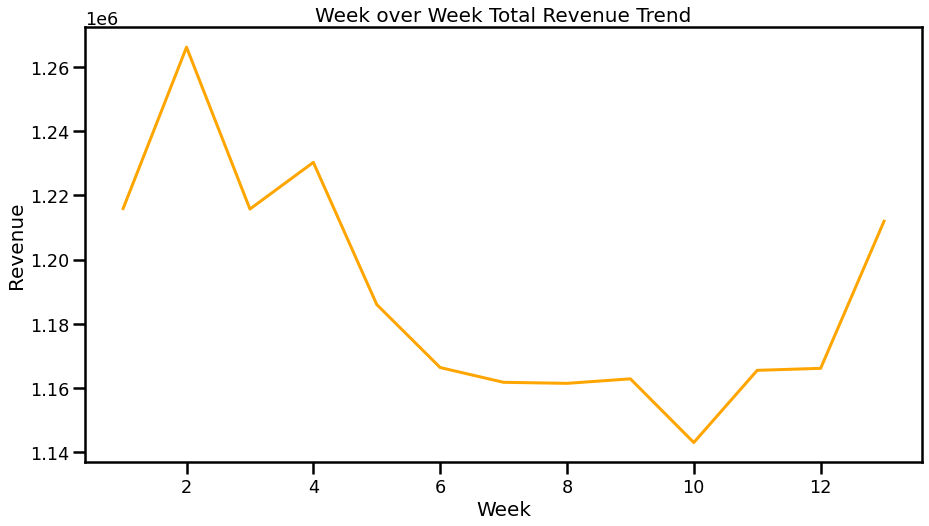

In [12]:
# Week over Week trend of total revenue
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.lineplot(x = 'Week', y = 'Revenue', data = total_wkly_rev, color = 'orange')
plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('Week over Week Total Revenue Trend')
plt.show()

The overall trend suggests that for the 20 categories being analyzed, revenue experienced a spike in growth from Week-1 to Week-2 then dropped sudenly by Week 3. A slight spike is seen by Week 4 but it dipped significantly again, plummeting to lower values than in week 1. This trend only changed by Week 10 where it continued to increase.

The above does not give a consistent weekly trend. More data over a longer period is needed to be able to identify a clear trend and/or seasonality. A similar plot with outliers excluded is seen below.

In [13]:
# function from stackoverflow
def Remove_Outlier_Indices(df):
    df = df.copy()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

In [14]:
# dataframe with no outliers
no_outlier_list = Remove_Outlier_Indices(df)
no_outliers = df[no_outlier_list]

C:\Users\Leonard\AppData\Local\Temp\ipykernel_15548\2519748129.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))


In [19]:
no_outliers.describe()

,Week,Customers,Contacts,Accepted Contacts,Revenue
count,260.000000,227.000000,226.000000,228.000000,244.000000
mean,7.000000,1513.995595,4445.522124,2255.447368,52950.290984
std,3.748874,748.603948,2117.067526,1298.809062,21554.448398
min,1.000000,299.000000,871.000000,477.000000,18239.000000
25%,4.000000,931.500000,3056.750000,1388.000000,38035.000000
50%,7.000000,1409.000000,4229.500000,1752.500000,48546.500000
75%,10.000000,1909.000000,5480.750000,3138.500000,61870.000000
max,13.000000,3895.000000,10332.000000,6834.000000,110909.000000


In [15]:
# Weekly Revenue without outliers
total_wkly_rev_no_outliers = no_outliers.groupby('Week')['Revenue'].sum().reset_index()

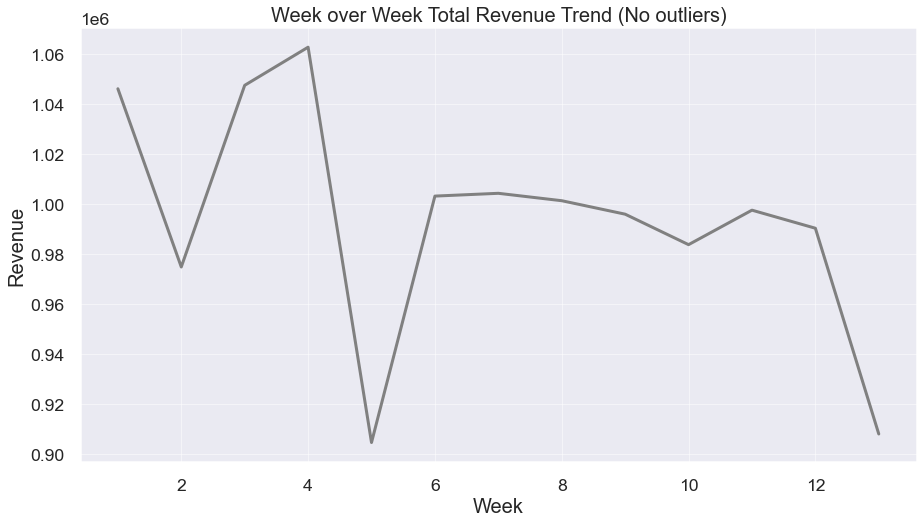

In [93]:
# Week over Week trend of total revenue without outliers
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.lineplot(x = 'Week', y = 'Revenue', data = total_wkly_rev_no_outliers, color = 'grey')
plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('Week over Week Total Revenue Trend (No outliers)')
# plt.savefig('images/{}_distribution.png'.format(col))
plt.show()

The chart does not illuatrate a clear and consistent trend, similar to the trend with the full data set. However, unlike in the latter where growth is seen from Week 10 onwards, revenue levels continue to plummet sharply around Week 11 after experiencing a gradual decrease from Week 6 onto Week 10. At this point, we can not confidently deduce that the outliers at least impacted the upward trend from Week 10.

Let's take a look at the outliers below:

In [44]:
outliers = df[~df.isin(no_outliers.to_dict('l')).all(1)]

C:\Users\Leonard\AppData\Local\Temp\ipykernel_15548\1513631141.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  outliers = df[~df.isin(no_outliers.to_dict('l')).all(1)]


In [45]:
# Get threshold for 3 STD
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
thresh = Q3 + 1.5 * IQR

In [48]:
revenue_outliers = df.loc[df['Revenue'] >= thresh.Revenue]

In [60]:
revenue_outliers

,Week,Category,Customers,Contacts,Accepted Contacts,Revenue
9,1,House Cleaning,7376,19565,12235,169773
29,2,House Cleaning,7441,20094,12923,176109
30,2,Interior Painting,1940,6503,3596,115172
49,3,House Cleaning,7363,20247,13051,168267
69,4,House Cleaning,7533,20289,13500,167534
89,5,House Cleaning,7813,20567,13687,165155
90,5,Interior Painting,2054,6739,3804,116278
109,6,House Cleaning,7679,20051,13380,163254
129,7,House Cleaning,7290,19642,13274,157545
149,8,House Cleaning,7543,21833,14401,160187


In [50]:
revenue_outliers_wkly_total_rev = revenue_outliers.groupby('Week')['Revenue'].sum().reset_index()

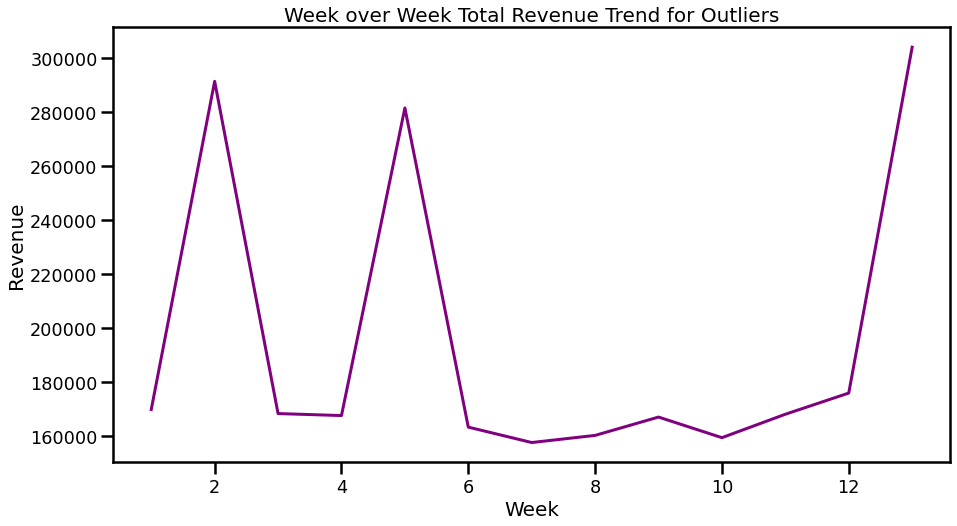

In [52]:
# Week over Week trend of total revenue for outliers
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.lineplot(x = 'Week', y = 'Revenue', data = revenue_outliers_wkly_total_rev, color = 'purple')
plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('Week over Week Total Revenue Trend for Outliers')
# plt.savefig('images/{}_distribution.png'.format(col))
plt.show()

Just like the previous plots, revenue growth fluctuated (not as low as in the case of revenue with no outliers) all the way to Week 10, when it starts increasing and later experienced a sudden spike from Week 12.

Varying revenue by Category as seen below, we observe that House Cleaning and Interior Painting services are the two main caegories that have positively impacted revenue albeit the seemingly downward trends seen between Week 2 to Week 10 in the overall trend. We can further deduce that they are the main drivers of total revenue stream to experience the spike starting from Week 10.

This trend validates that seen in the Box Distribution by Category plot where House Cleaning and Interior Painting have values that are way above the rest.

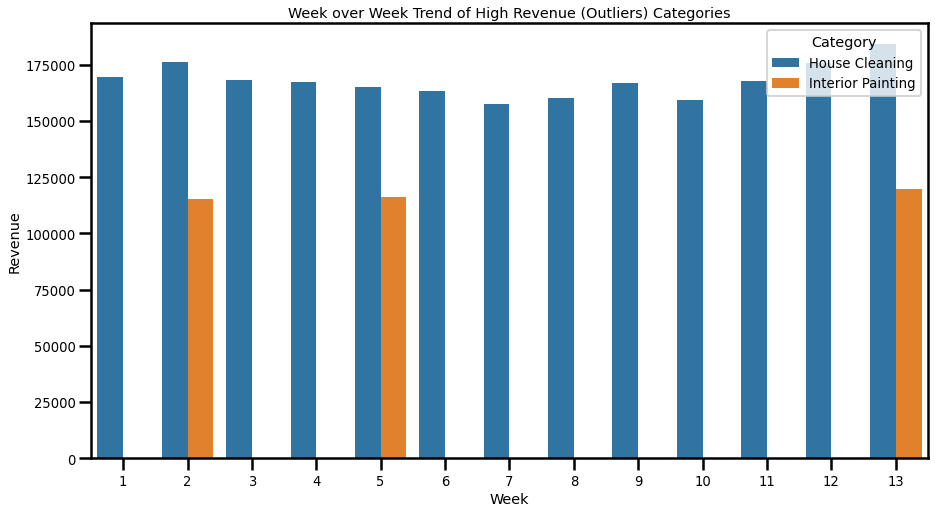

In [61]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
bar = sns.barplot(x = 'Week', y = 'Revenue', data = revenue_outliers, hue='Category', ci = None, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('Week over Week Trend of High Revenue (Outliers) Categories')
# plt.savefig('images/{}_{}.png'.format(col_x, col_y))
plt.show()

So far, we have only looked at total revenue trends and highlighted two categories that are most influential in week over week revenue stream. We still do not know how each stage of the funnel affects revenue. 

The following section will analyze relationships between the business funnels and their impact on revenue.

## Business Funnel - Revenue Relationship

Let's first see week over week trends of the Customers, Contacts and Accepted contacts.

In [63]:
# total weekly counts
total_wkly_customers = df.groupby('Week')['Customers'].sum().reset_index()
total_wkly_contacts = df.groupby('Week')['Contacts'].sum().reset_index()
total_wkly_accepted_contacts = df.groupby('Week')['Accepted Contacts'].sum().reset_index()

In [74]:
# # Week over Week trend of total customers 
# fig, ax = plt.subplots()
# fig.set_size_inches(15, 8)
# sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
# sns.lineplot(x = 'Week', y = 'Customers', data = total_wkly_customers, color = 'purple')
# plt.setp(ax.get_xticklabels(), rotation=0)
# plt.title('Week over Week Total Customers Trend')
# # plt.savefig('images/{}_distribution.png'.format(col))
# plt.show()

In [75]:
# Week over Week trend of total contacts
# fig, ax = plt.subplots()
# fig.set_size_inches(15, 8)
# sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
# sns.lineplot(x = 'Week', y = 'Contacts', data = total_wkly_contacts, color = 'purple')
# plt.setp(ax.get_xticklabels(), rotation=0)
# plt.title('Week over Week Total Contacts Trend')
# # plt.savefig('images/{}_distribution.png'.format(col))
# plt.show()

In [76]:
# Week over Week trend of total accpted contacts
# fig, ax = plt.subplots()
# fig.set_size_inches(15, 8)
# sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
# sns.lineplot(x = 'Week', y = 'Accepted Contacts', data = total_wkly_accepted_contacts, color = 'purple')
# plt.setp(ax.get_xticklabels(), rotation=0)
# plt.title('Week over Week Total Accepted Contacts Trend')
# # plt.savefig('images/{}_distribution.png'.format(col))
# plt.show()

In [72]:
df_business_funnel_sum = df[['Week', 'Customers', 'Contacts', 'Accepted Contacts']].groupby('Week').sum().reset_index()
df_business_funnel_sum = df_business_funnel_sum.set_index('Week')

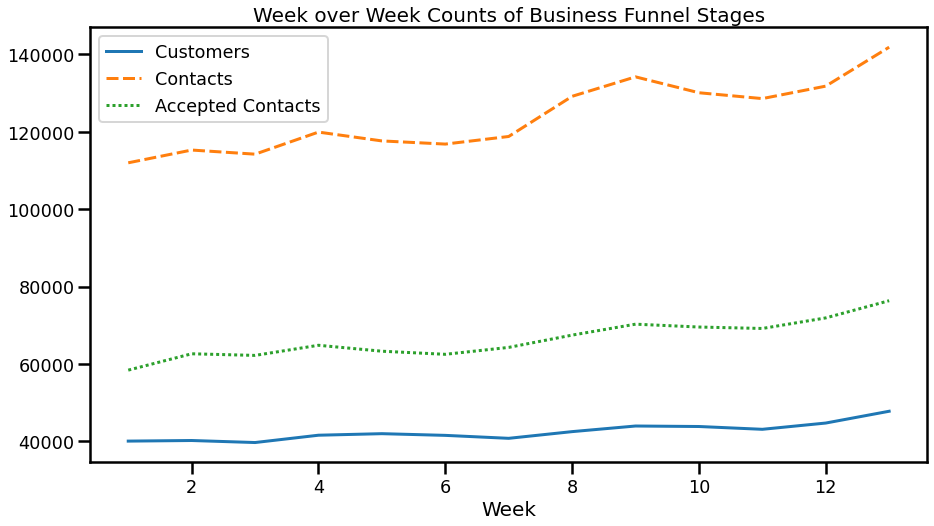

In [77]:
# Week over Week trend of total counts of business funnel
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.lineplot(data = df_business_funnel_sum)
plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('Week over Week Counts of Business Funnel Stages')
# plt.savefig('images/{}_distribution.png'.format(col))
plt.show()

All the stages before Revenue show an upward trend week over week. This is a stark contrast to total revenue trend which displayed a less apparent pattern. The chart also confirms the business model of the organization where a customer can contact several professionals as seen in the weekly difference between Customers and Contacts, while professionals then have the option to accept all or narrow down the pool of contacts.

Eventhough the above chart displayed evident trends compared to Revenue, we still can not determine the relationships between the three stages to revenue. A Pearson Correlation will be used to compute the pairwise correlation to measure the strength of linear relationships.

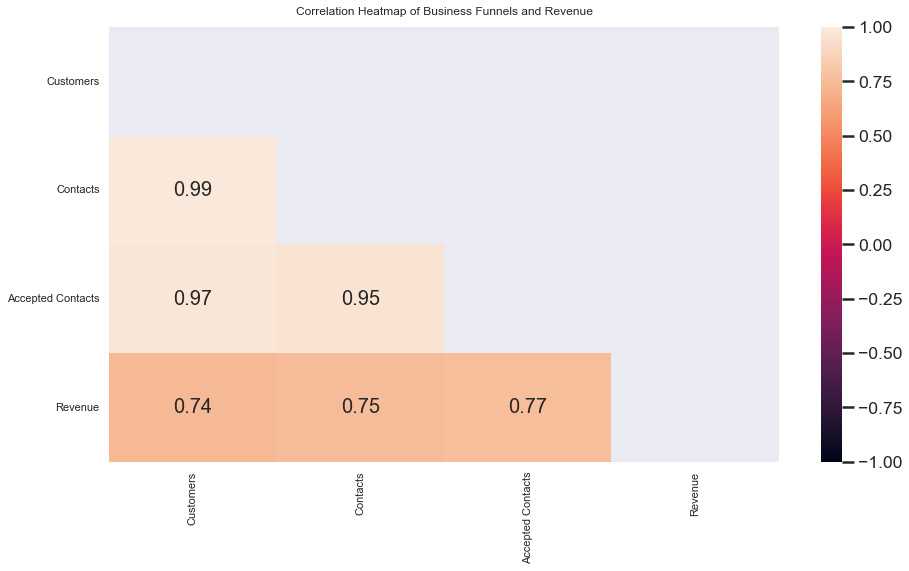

In [87]:
# Correlation Heatmap
df_corr = df.drop('Week', axis=1)
sns.set(font_scale = 1)
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
mask = np.triu(np.ones_like(df_corr.corr(), dtype = bool))
heatmap = sns.heatmap(df_corr.corr(), vmin = -1, vmax = 1, mask = mask, annot = True)
heatmap.set_title('Correlation Heatmap of Business Funnels and Revenue', fontdict = {'fontsize': 12}, pad = 12)
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.setp(ax.get_yticklabels(), rotation = 0)
plt.show()

The Correlation Heatmap has shown that there's a reasonable linear relationship between the three funnel stages and revenue with the strongest observed between Accepted Contacts and Revenue, recording a coefficient of 0.77. This signifies that an increase in Accepted Contacts will correspond to a positive change in Revenue and vice versa. The scatterplot below depicts this relationship.

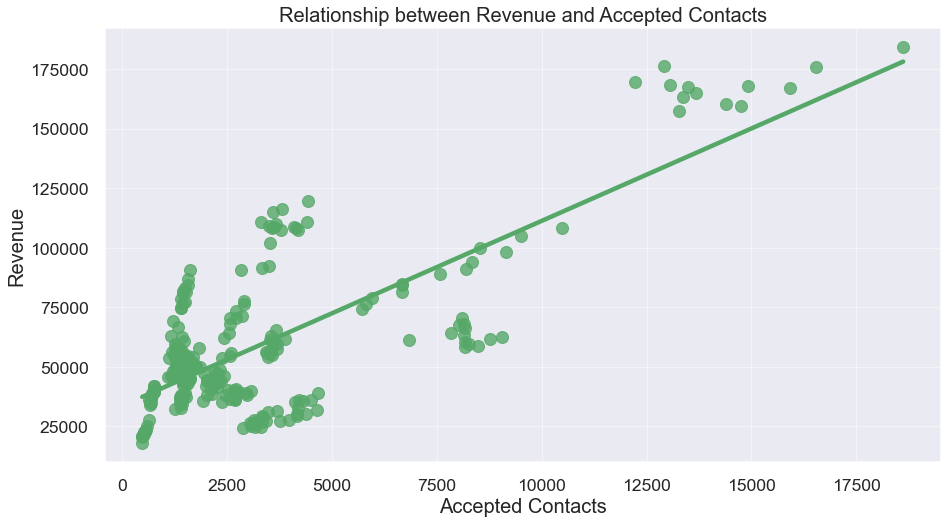

In [88]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.regplot(data=df, x="Accepted Contacts", y="Revenue", color='g', ci=None)
plt.title('Relationship between Revenue and Accepted Contacts')
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

Similar plot to identify how the different categories are represented is seen below.

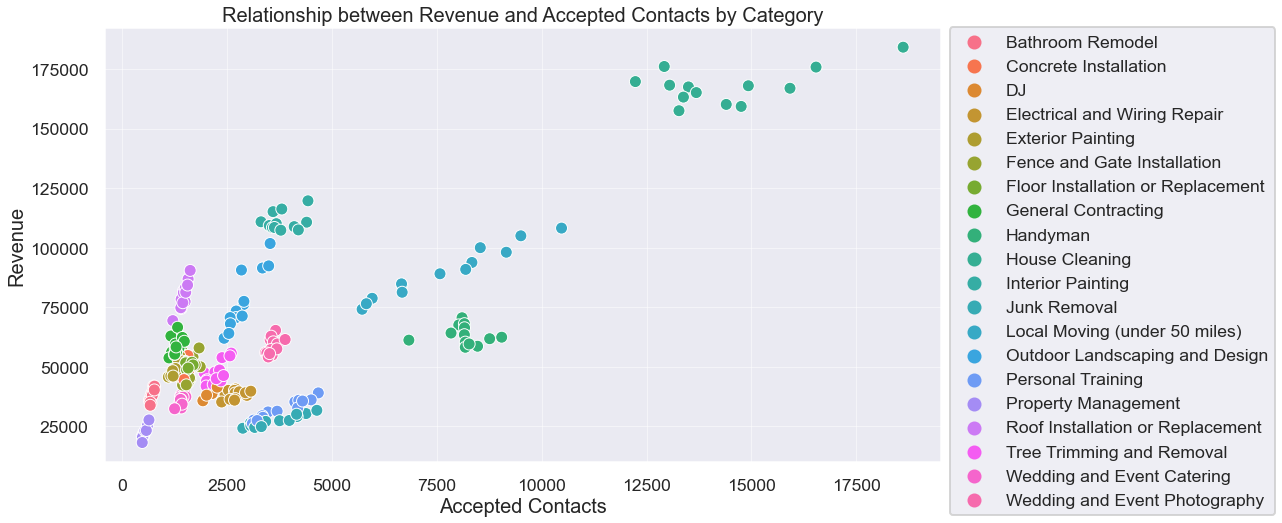

In [92]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context('poster', font_scale = 0.8, rc = {'grid.linewidth': 0.5, "font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.scatterplot(data=df, x="Accepted Contacts", y="Revenue", hue='Category')
plt.title('Relationship between Revenue and Accepted Contacts by Category')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

As can be observed, the categories are clearly segmented, showing both the spread of Accepted Contacts and Revenue. Individually, they all show an upward trend, exhibiting positive linear relationship between Revenue and Accepted Contacts with the exception of Handyman which interestingly exhibits a negative relationship. We can also observe extreme outlier in the case House Cleaning and some data points in Interior Painting, confirming the insights that had been previously uncovered on categories that might be influencing revenue trends.

## Conclusions

We can conclude, answering the questions posed in this challenge with the following:

- Revenue exhibits several trends, noteably:
    - An almost gradual decline from Week 2 to 10.
    - Growth from Week 10 to 13 but not as high as in Week 1.
    - A positive linear relationship between Revenue and the business funnels with Accepted Contacts being the most impactful.

- House Cleaning is leading the drive in revenue trend followed by Interior Painting. House Cleaning records the highest number of accepted contacts which then translates into higher revenue while, Interior painting has fewer accepted contacts but yet still records the second highest revenue. Several reasons for this might include the following:
    - Interior painting services are requested less often compared to House Cleaning, but the former costs more and as such, fewer accepted contacts can drive higher revenue compared to the latter. A search on Thumbtack's website shows that the national average cost to paint a single room is about `$917` while a one bedroom costs on average between `$80` to `$100` to clean. So evidently, more House Cleaning accepted contacts are required to generate similar revenue to Interior Painting.
    
- For the thirteen weeks of data provided, we are confident about Accepted Contacts having the strongest linear relationship with Revenue. A coefficient of 0.77 with a confidence interval of `95%` as computed by the regression plot, depicts a reasonable strong relationship.

- It might appear that overall week over week revenue trend follows similar patterns as seen in that found in House Cleaning and Interior Painting where a drop in their individual revenue significantly impacts overall revenue but this might not always hold true. Other variables not included in this dataset that can help in uncovering more meaningful trends include:
    - Location
        - Generally, price varies with location. Services in the San francisco - Bay Area will cost way more than in Detroit. If service demand comes from areas with lower cost of living, revenue will not be significantly impacted as compared to higher cost of living locations.
    - Date
        - Eventhough thirteen weeks worth of data is provided, it is not enough as it does not specify the time of the year corresponding to those weeks. Some services are more in demand at certain times of the year compared to others. For example, weddings are usually held between May and October so, wedding related services like photography and catering which are generally expensive (according to Thumbtack, natioanal average of `$500` and `$1520`, respectively) might be the main drivers during those months. Therfore, in addition to explicit dates/timestamps, a whole years' worth of data will be tremendoulsy helpful in understanding revenue trends and drivers.